<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(_1_6)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-1.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-1.6_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,31.135269,61.417641,92.632290,63.118125,-0.045448,258.257876,258.294500,-0.036624
1,0.0,1.0,51.311447,64.945106,25.862470,85.192435,0.028081,237.339539,237.331637,0.007902
2,0.0,2.0,65.559468,71.983148,86.612907,20.325796,-0.028754,254.452565,254.479682,-0.027116
3,0.0,3.0,51.853889,77.483547,77.578725,96.132150,-0.053083,312.995228,313.038512,-0.043283
4,0.0,4.0,27.563254,65.437926,81.594154,23.035971,-0.002279,207.629025,207.636306,-0.007281
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,60.448761,63.126024,45.251490,97.562130,-0.037306,276.351098,276.384637,-0.033538
59996,999.0,56.0,50.066648,70.927194,42.454932,29.245225,-0.018888,202.675111,202.714379,-0.039268
59997,999.0,57.0,31.948052,25.500384,76.438902,79.098899,0.061375,223.047612,222.987325,0.060287
59998,999.0,58.0,96.535116,87.704977,76.143008,86.656826,-0.007019,357.032908,357.026187,0.006721


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    31.135269  61.417641  92.632290  63.118125 -0.045448  258.257876   
      1.0    51.311447  64.945106  25.862470  85.192435  0.028081  237.339539   
      2.0    65.559468  71.983148  86.612907  20.325796 -0.028754  254.452565   
      3.0    51.853889  77.483547  77.578725  96.132150 -0.053083  312.995228   
      4.0    27.563254  65.437926  81.594154  23.035971 -0.002279  207.629025   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   60.448761  63.126024  45.251490  97.562130 -0.037306  276.351098   
      56.0   50.066648  70.927194  42.454932  29.245225 -0.018888  202.675111   
      57.0   31.948052  25.500384  76.438902  79.098899  0.061375  223.047612   
      58.0   96.535116  87.704977  76.143008  86.656826 -0.007019  357.032908   
      59.0   61.946213  49.797575  43.435109  98.229123 -0.037367  263.370653   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    258.294500 -0.036624  
      1.0    237.331637  0.007902  
      2.0    254.479682 -0.027116  
      3.0    313.038512 -0.043283  
      4.0    207.636306 -0.007281  
...                 ...       ...  
999.0 55.0   276.384637 -0.033538  
      56.0   202.714379 -0.039268  
      57.0   222.987325  0.060287  
      58.0   357.026187  0.006721  
      59.0   263.410196 -0.039543  

[60000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    31.135269  61.417641  92.632290  63.118125 -0.045448  258.257876   
      1.0    51.311447  64.945106  25.862470  85.192435  0.028081  237.339539   
      2.0    65.559468  71.983148  86.612907  20.325796 -0.028754  254.452565   
      3.0    51.853889  77.483547  77.578725  96.132150 -0.053083  312.995228   
      4.0    27.563254  65.437926  81.594154  23.035971 -0.002279  207.629025   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   60.448761  63.126024  45.251490  97.562130 -0.037306  276.351098   
      56.0   50.066648  70.927194  42.454932  29.245225 -0.018888  202.675111   
      57.0   31.948052  25.500384  76.438902  79.098899  0.061375  223.047612   
      58.0   96.535116  87.704977  76.143008  86.656826 -0.007019  357.032908   
      59.0   61.946213  49.797575  43.435109  98.229123 -0.037367  263.370653   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    258.294500 -0.036624  
      1.0    237.331637  0.007902  
      2.0    254.479682 -0.027116  
      3.0    313.038512 -0.043283  
      4.0    207.636306 -0.007281  
...                 ...       ...  
999.0 55.0   276.384637 -0.033538  
      56.0   202.714379 -0.039268  
      57.0   222.987325  0.060287  
      58.0   357.026187  0.006721  
      59.0   263.410196 -0.039543  

[60000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,31.135269,61.417641,92.632290,63.118125,-0.045448,258.257876,258.294500,-0.036624
1,0.0,1.0,51.311447,64.945106,25.862470,85.192435,0.028081,237.339539,237.331637,0.007902
2,0.0,2.0,65.559468,71.983148,86.612907,20.325796,-0.028754,254.452565,254.479682,-0.027116
3,0.0,3.0,51.853889,77.483547,77.578725,96.132150,-0.053083,312.995228,313.038512,-0.043283
4,0.0,4.0,27.563254,65.437926,81.594154,23.035971,-0.002279,207.629025,207.636306,-0.007281
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,60.448761,63.126024,45.251490,97.562130,-0.037306,276.351098,276.384637,-0.033538
59996,999.0,56.0,50.066648,70.927194,42.454932,29.245225,-0.018888,202.675111,202.714379,-0.039268
59997,999.0,57.0,31.948052,25.500384,76.438902,79.098899,0.061375,223.047612,222.987325,0.060287
59998,999.0,58.0,96.535116,87.704977,76.143008,86.656826,-0.007019,357.032908,357.026187,0.006721


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    31.135269  61.417641  92.632290  63.118125 -0.045448  258.257876   
      1.0    51.311447  64.945106  25.862470  85.192435  0.028081  237.339539   
      2.0    65.559468  71.983148  86.612907  20.325796 -0.028754  254.452565   
      3.0    51.853889  77.483547  77.578725  96.132150 -0.053083  312.995228   
      4.0    27.563254  65.437926  81.594154  23.035971 -0.002279  207.629025   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   60.448761  63.126024  45.251490  97.562130 -0.037306  276.351098   
      56.0   50.066648  70.927194  42.454932  29.245225 -0.018888  202.675111   
      57.0   31.948052  25.500384  76.438902  79.098899  0.061375  223.047612   
      58.0   96.535116  87.704977  76.143008  86.656826 -0.007019  357.032908   
      59.0   61.946213  49.797575  43.435109  98.229123 -0.037367  263.370653   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    258.294500 -0.036624  
      1.0    237.331637  0.007902  
      2.0    254.479682 -0.027116  
      3.0    313.038512 -0.043283  
      4.0    207.636306 -0.007281  
...                 ...       ...  
999.0 55.0   276.384637 -0.033538  
      56.0   202.714379 -0.039268  
      57.0   222.987325  0.060287  
      58.0   357.026187  0.006721  
      59.0   263.410196 -0.039543  

[60000 rows x 8 columns]

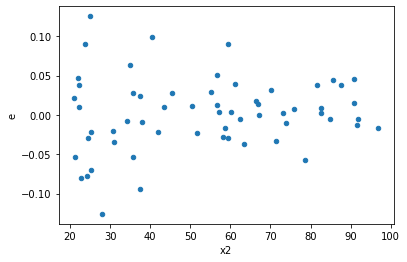

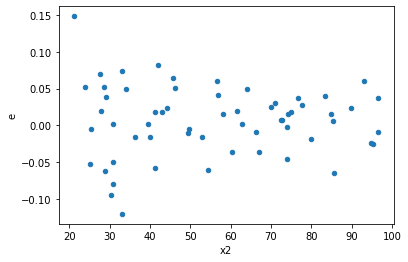

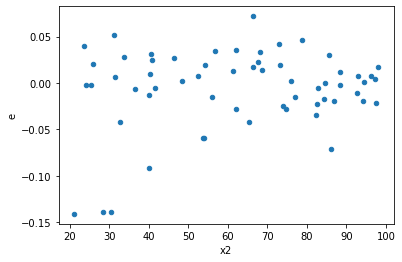

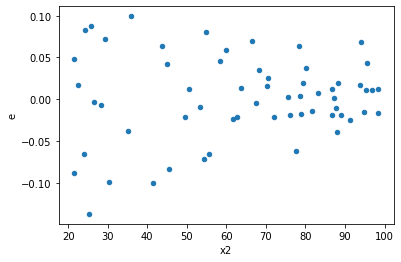

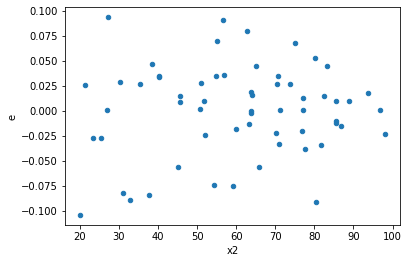

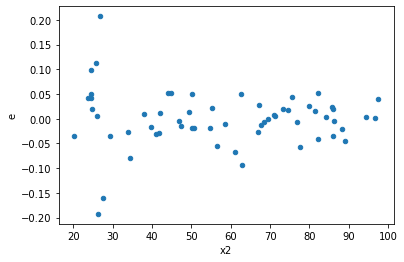

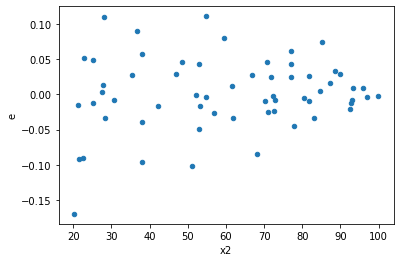

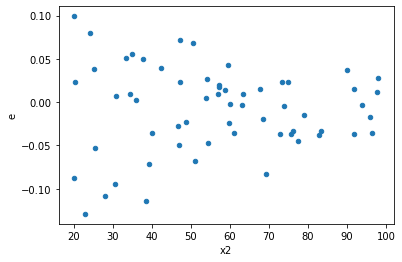

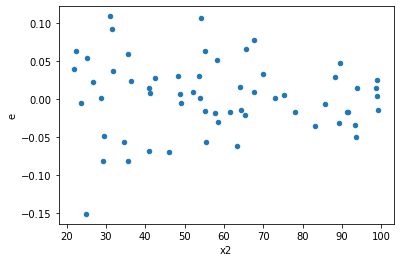

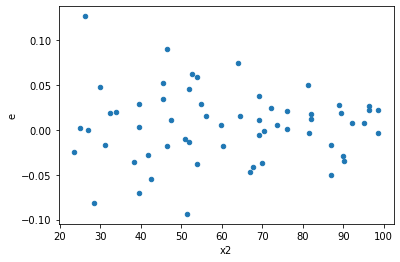

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,31.0,21.0,0.03507797109320039,0.0496788110693151,0.0011315474546193674,0.0023656576699673856,2.090639380884959,0.08154114891673836,0.9592294255416308,0.04077057445836918,Reject005=1 : Homoscedasticity
2.0,23.0,29.0,0.06981485733573697,0.1583190464482611,0.003035428579814651,0.0054592774637331415,1.7985194908016895,0.1352779797238426,0.9323610101380787,0.0676389898619213,Reject005=1 : Homoscedasticity
3.0,22.0,30.0,0.012504661972941202,0.06656753877624848,0.0005683937260427819,0.0022189179592082826,3.9038396406248665,0.0006503263106723001,0.9996748368446638,0.00032516315533615003,Reject005=0 : Heteroscedasticity
4.0,33.0,19.0,0.05266937103249109,0.04671732061506326,0.001596041546439124,0.0024588063481612243,1.5405653779170012,0.3219383280079926,0.8390308359960037,0.1609691640039963,Reject005=1 : Homoscedasticity
5.0,22.0,30.0,0.03489678033265875,0.10253343669304765,0.001586217287848125,0.0034177812231015884,2.1546740470457095,0.05115667565425275,0.9744216621728736,0.025578337827126374,Reject005=1 : Homoscedasticity
6.0,33.0,19.0,0.03244328042465122,0.061330381027360666,0.0009831297098379158,0.003227914790913719,3.283305100652376,0.00810483803608375,0.9959475809819581,0.004052419018041875,Reject005=0 : Heteroscedasticity
11.0,27.0,25.0,0.052646974523059324,0.06854693237382459,0.0019498879452984935,0.0027418772949529837,1.406171724669671,0.3946907696338404,0.8026546151830798,0.1973453848169202,Reject005=1 : Homoscedasticity
12.0,20.0,32.0,0.033075759264293424,0.06309952589086622,0.001653787963214671,0.0019718601840895693,1.1923295053234164,0.6412523040749885,0.6793738479625058,0.3206261520374942,Reject005=1 : Homoscedasticity
14.0,27.0,25.0,0.046377597789939315,0.055752941098156567,0.0017176888070347895,0.0022301176439262628,1.2983246061759397,0.5146069251887324,0.7426965374056338,0.2573034625943662,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,31.0,21.0,0.03507797109320039,0.0496788110693151,0.0011315474546193674,0.0023656576699673856,2.090639380884959,0.08154114891673836,Reject005=1 : Homoscedasticity
1.0,37.0,15.0,0.07253522110978487,0.006365958195313071,0.001960411381345537,0.0004243972130208714,0.21648375287924745,0.000148617739008862,Reject005=0 : Heteroscedasticity
2.0,23.0,29.0,0.06981485733573697,0.1583190464482611,0.003035428579814651,0.0054592774637331415,1.7985194908016895,0.1352779797238426,Reject005=1 : Homoscedasticity
3.0,22.0,30.0,0.012504661972941202,0.06656753877624848,0.0005683937260427819,0.0022189179592082826,3.9038396406248665,0.0006503263106723001,Reject005=0 : Heteroscedasticity
4.0,33.0,19.0,0.05266937103249109,0.04671732061506326,0.001596041546439124,0.0024588063481612243,1.5405653779170012,0.3219383280079926,Reject005=1 : Homoscedasticity
5.0,22.0,30.0,0.03489678033265875,0.10253343669304765,0.001586217287848125,0.0034177812231015884,2.1546740470457095,0.05115667565425275,Reject005=1 : Homoscedasticity
6.0,33.0,19.0,0.03244328042465122,0.061330381027360666,0.0009831297098379158,0.003227914790913719,3.283305100652376,0.00810483803608375,Reject005=0 : Heteroscedasticity
7.0,17.0,35.0,0.034873856261490296,0.04649812011460507,0.0020514033094994294,0.001328517717560145,0.6476141046512797,0.3411386265466609,Reject005=1 : Homoscedasticity
8.0,37.0,15.0,0.09829712910418464,0.00822479152246578,0.0026566791649779635,0.0005483194348310519,0.20639279370250946,9.165958053788762e-05,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      623
Reject005=0 : Heteroscedasticity    377
Name: Result_test, dtype: int64